In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic

In [2]:
npd = npy.NumpyDirectory('/data/readout/2017-11-28_122535_test.npd/')

In [3]:
print(npd.metadata.script_code)

"""
Measure resonators, one at a time, with the readout tone centered in the filterbank bin.
"""
from __future__ import division
import time


import numpy as np

from kid_readout.roach import analog, calculate, hardware_tools, tools
from kid_readout.measurement import acquire, basic
from kid_readout.equipment import hardware, starcryo_temps
from equipment.srs import lockin
from equipment.custom import mmwave_source
from kid_readout.settings import LOCKIN_SERIAL_PORT

acquire.show_settings()
acquire.show_git_status()

import logging
logger = acquire.get_script_logger(__file__, level=logging.DEBUG)


# Parameters
suffix = 'test'
attenuations = [0]
f_center = 1e6 * np.array([3420.5])
fractional_frequency_shift = 0
f_center *= (1 + fractional_frequency_shift)
df_baseband_target = 60e3
f_sweep_span = 2e6  # The total span of the baseband tones
f_lo_spacing = 2.5e3  # This is the smallest resolution available
f_baseband_minimum = 100e6  # Keep the tones away from the LO by at least this fre

In [4]:
npd.node_names()

['ADCSnap0', 'SingleSweep1']

In [6]:
snap = npd.ADCSnap0
sweep = npd.SingleSweep1

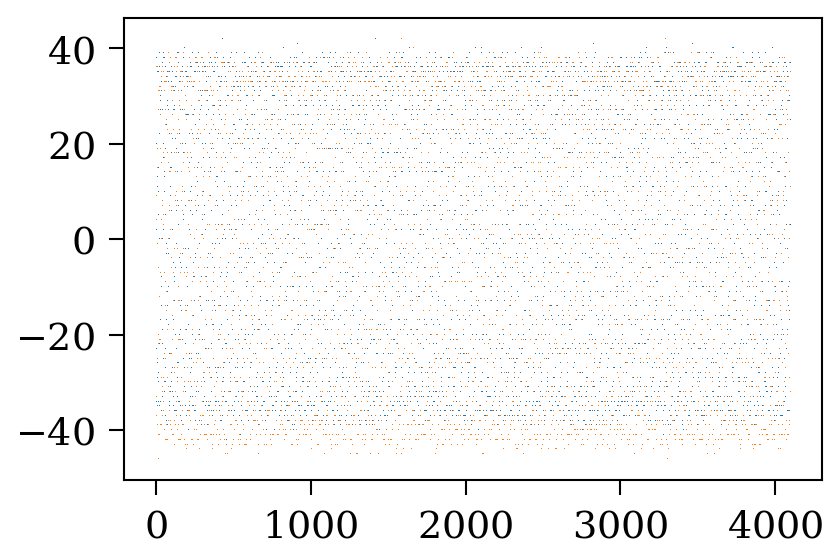

In [7]:
fig, ax = plt.subplots()
ax.plot(snap.x, ',')
ax.plot(snap.y, ',')

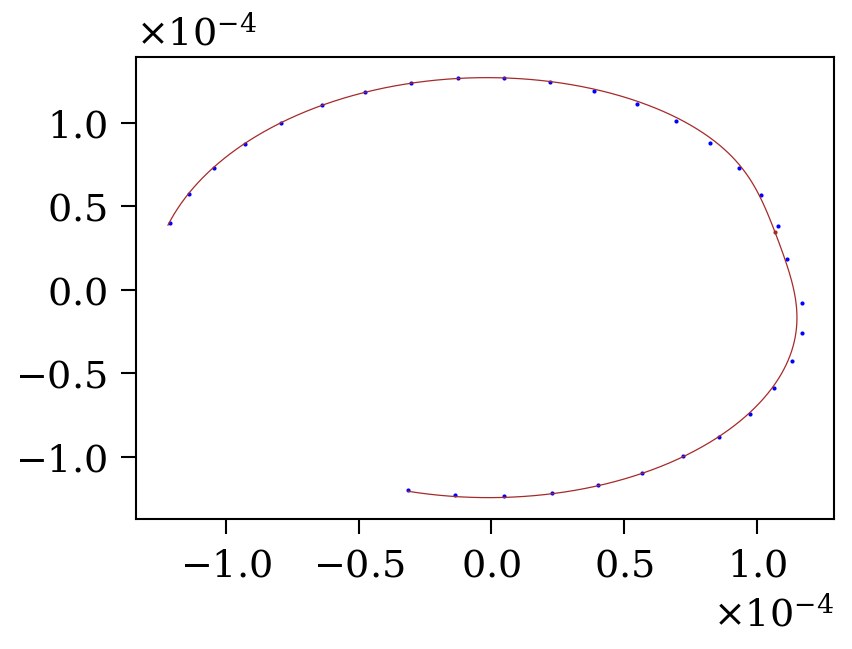

In [8]:
fig, ax = plt.subplots()
plot_basic.resonator_complex_plane(resonator=sweep.resonator, axis=ax, normalize=False);

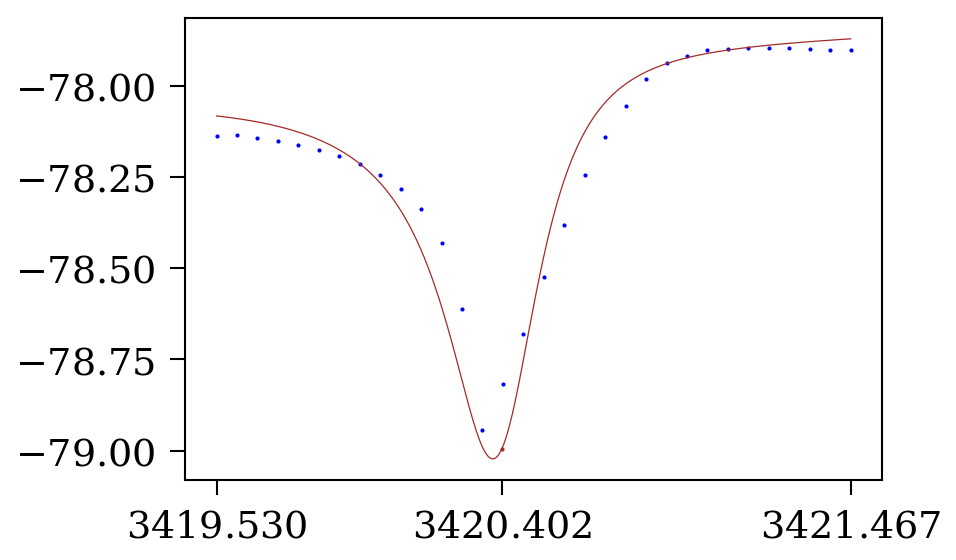

In [9]:
fig, ax = plt.subplots()
plot_basic.resonator_amplitude(resonator=sweep.resonator, axis=ax, normalize=False);

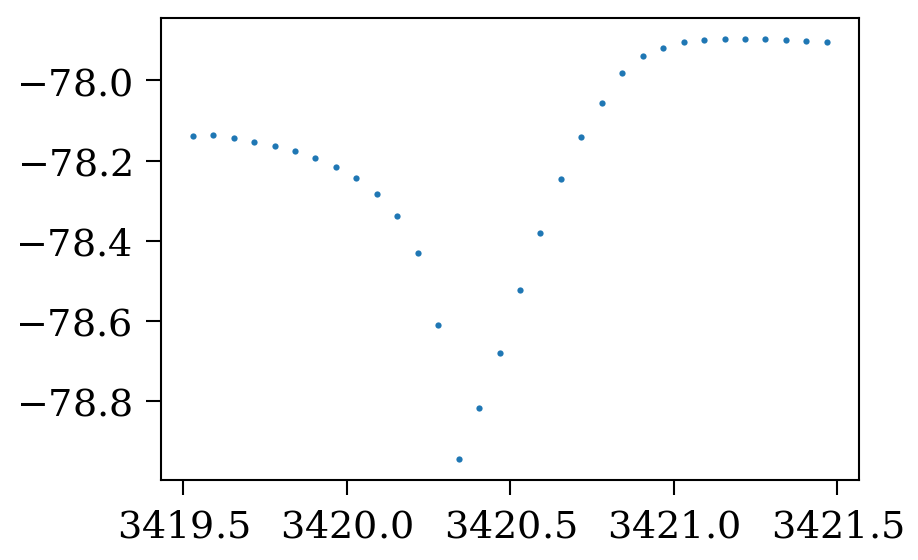

In [10]:
fig, ax = plt.subplots()
ax.plot(sweep.frequency_MHz, 20 * np.log10(np.abs(sweep.s21_point)), '.')